In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
import numpy as np

In [6]:
np.random.seed(0)

x = np.random.randn(200, 2)
y = np.where(np.logical_xor(x[:,0] > 0, x[:,1] > 0), 0, 1)

print(x)
print(y)

[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351]
 [ 0.76103773  0.12167502]
 [ 0.44386323  0.33367433]
 [ 1.49407907 -0.20515826]
 [ 0.3130677  -0.85409574]
 [-2.55298982  0.6536186 ]
 [ 0.8644362  -0.74216502]
 [ 2.26975462 -1.45436567]
 [ 0.04575852 -0.18718385]
 [ 1.53277921  1.46935877]
 [ 0.15494743  0.37816252]
 [-0.88778575 -1.98079647]
 [-0.34791215  0.15634897]
 [ 1.23029068  1.20237985]
 [-0.38732682 -0.30230275]
 [-1.04855297 -1.42001794]
 [-1.70627019  1.9507754 ]
 [-0.50965218 -0.4380743 ]
 [-1.25279536  0.77749036]
 [-1.61389785 -0.21274028]
 [-0.89546656  0.3869025 ]
 [-0.51080514 -1.18063218]
 [-0.02818223  0.42833187]
 [ 0.06651722  0.3024719 ]
 [-0.63432209 -0.36274117]
 [-0.67246045 -0.35955316]
 [-0.81314628 -1.7262826 ]
 [ 0.17742614 -0.40178094]
 [-1.63019835  0.46278226]
 [-0.90729836  0.0519454 ]
 [ 0.72909056  0.12898291]
 [ 1.13940068 -1.23482582]
 

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [8]:
def plot_decision_regions(x, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=cmap.colors[idx], marker='.', label=cl)

In [12]:
# kernel="linear" : 초평면 형태를 선으로 나누겠다
# C (cost) : 이상치 허용 (낮으면 많이 허용, 높으면 적게 허용)
# l2 규제 사용

from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=0, C=1)
svc.fit(x, y)

SVC(C=1, kernel='linear', random_state=0)

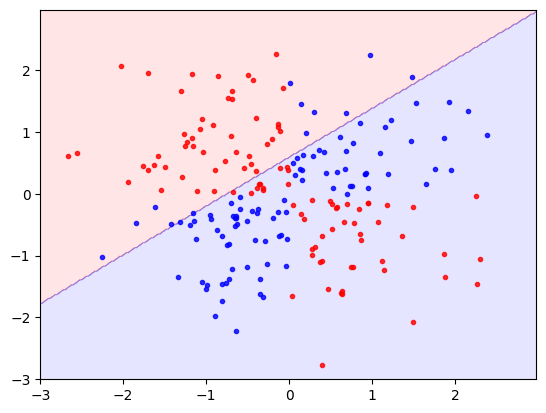

In [13]:
plot_decision_regions(x, y, svc)

In [15]:
# rbf : 가우시안 rbf 커널 (Radial Basis Function)
# gamma : 경계의 복잡도 (서포트벡터의 영향력이 미치는 거리 - 표준편차)
# 클수록 작은 표준편차 > overfitting 위험
# 작을수록 큰 표준편차 > underfitting 위험

model = SVC(kernel="rbf", random_state=0, C=1, gamma=1)
model.fit(x, y)

SVC(C=1, gamma=1, random_state=0)

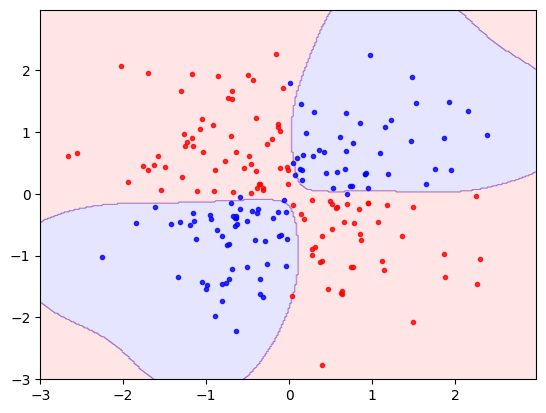

In [16]:
plot_decision_regions(x, y, model)